# Préparation des données 


In [2]:
import yfinance as yf 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime,timedelta

In [3]:
ticker = 'SPY'

In [4]:
# la periode
end_date = datetime.now()
start_date = end_date - timedelta(days=364/2)
end_date = end_date.strftime('%Y-%m-%d')
end_date
start_date = start_date.strftime('%Y-%m-%d')
end_date_forcat = datetime.now() + timedelta(days=30)
end_date_forcat = end_date_forcat.strftime('%Y-%m-%d')
end_date_forcat

'2024-02-01'

In [5]:
# create a dataframe to store close prices 
close_df = pd.DataFrame()
close_df

""


In [6]:
data = yf.download(ticker,start=start_date,end=end_date)
     
close_df[ticker] = data['Close']


[*********************100%%**********************]  1 of 1 completed


In [7]:
close_df.tail()

,SPY
Date,
2023-12-22,473.649994
2023-12-26,475.649994
2023-12-27,476.510010
2023-12-28,476.690002
2023-12-29,475.309998


<AxesSubplot:xlabel='Date'>

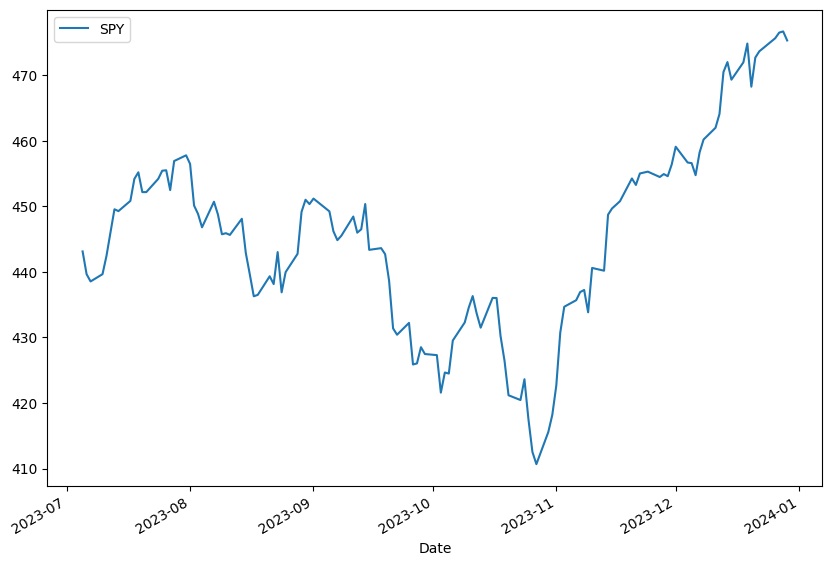

In [8]:
close_df.plot(figsize=(10, 7))

# Teste de normalité

In [9]:

# close_df.reset_index(inplace=True)
# close_df.info(
from scipy import stats
def normaltest(x):
    print(stats.normaltest(x))
    if(stats.normaltest(x)[1]<0.05):
        print("Not normally distributed")
    else:
        print("Normally distributed")

normaltest(close_df)

NormaltestResult(statistic=array([0.17011292]), pvalue=array([0.91846043]))
Normally distributed


(array([ 2.,  1.,  3.,  4.,  5.,  6.,  6., 11., 10.,  9., 10., 12., 11.,
        16.,  4.,  2.,  1.,  2.,  4.,  6.]),
 array([410.67999268, 413.98049316, 417.28099365, 420.58149414,
        423.88199463, 427.18249512, 430.48299561, 433.78349609,
        437.08399658, 440.38449707, 443.68499756, 446.98549805,
        450.28599854, 453.58649902, 456.88699951, 460.1875    ,
        463.48800049, 466.78850098, 470.08900146, 473.38950195,
        476.69000244]),
 <BarContainer object of 20 artists>)

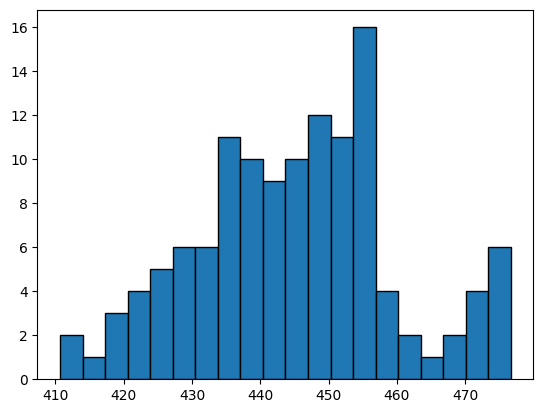

In [10]:
plt.hist(close_df, edgecolor='black', bins=20)


(array([1., 1., 0., 1., 0., 1., 1., 1., 2., 1., 1., 2., 3., 2., 1., 3., 3.,
        2., 3., 2., 7., 2., 6., 3., 0., 8., 1., 7., 2., 5., 9., 5., 3., 5.,
        8., 5., 2., 1., 1., 1., 0., 1., 0., 0., 2., 1., 2., 2., 1., 4.]),
 array([6.0178143 , 6.02079535, 6.02377639, 6.02675743, 6.02973847,
        6.03271951, 6.03570055, 6.0386816 , 6.04166264, 6.04464368,
        6.04762472, 6.05060576, 6.0535868 , 6.05656785, 6.05954889,
        6.06252993, 6.06551097, 6.06849201, 6.07147306, 6.0744541 ,
        6.07743514, 6.08041618, 6.08339722, 6.08637826, 6.08935931,
        6.09234035, 6.09532139, 6.09830243, 6.10128347, 6.10426451,
        6.10724556, 6.1102266 , 6.11320764, 6.11618868, 6.11916972,
        6.12215076, 6.12513181, 6.12811285, 6.13109389, 6.13407493,
        6.13705597, 6.14003701, 6.14301806, 6.1459991 , 6.14898014,
        6.15196118, 6.15494222, 6.15792326, 6.16090431, 6.16388535,
        6.16686639]),
 <BarContainer object of 50 artists>)

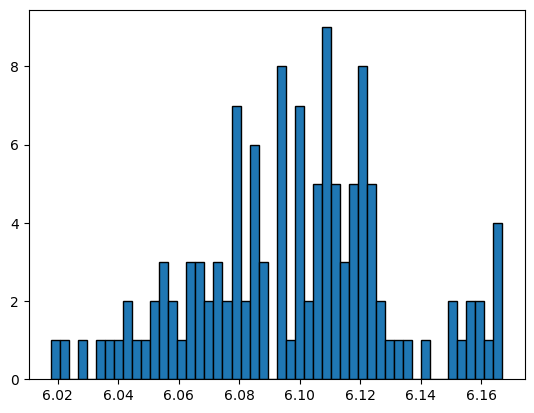

In [11]:

close_dfLog=np.log(close_df)
plt.hist(close_dfLog, edgecolor='black', bins=50)


In [12]:
from scipy import stats
print(stats.normaltest(close_dfLog))
if(stats.normaltest(close_dfLog)[1]<0.05):
    print(" not normally distributed")
else:
    print(" normally distributed")

NormaltestResult(statistic=array([0.14239931]), pvalue=array([0.93127594]))
 normally distributed


# Test de stationnarité

In [13]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
         print("\x1b[31mNon-stationary\x1b[0m")

In [14]:
# for AAPL
check_stationarity(close_dfLog)

ADF Statistic: -0.440261
p-value: 0.903157
Critical Values:
	1%: -3.484
	5%: -2.885
	10%: -2.579
Non-stationary


In [15]:
# Differencing to make the time series stationary
close_dff = pd.DataFrame()
close_dff['Differenced_Data'] = close_df - close_df.shift(1)
close_dff = close_dff.dropna()

<AxesSubplot:xlabel='Date'>

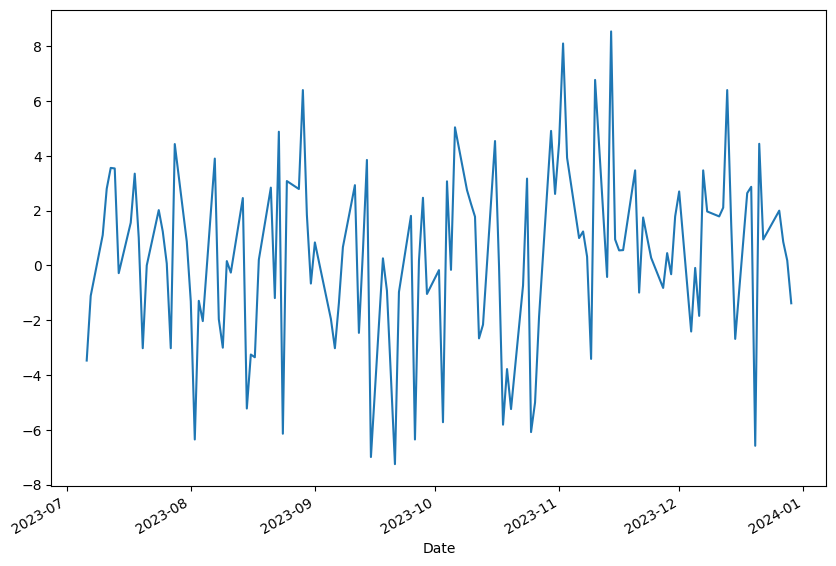

In [16]:
close_dff['Differenced_Data'].plot(figsize=(10, 7))

In [17]:
check_stationarity(close_dff['Differenced_Data'])

ADF Statistic: -10.045169
p-value: 0.000000
Critical Values:
	1%: -3.485
	5%: -2.885
	10%: -2.579
Stationary


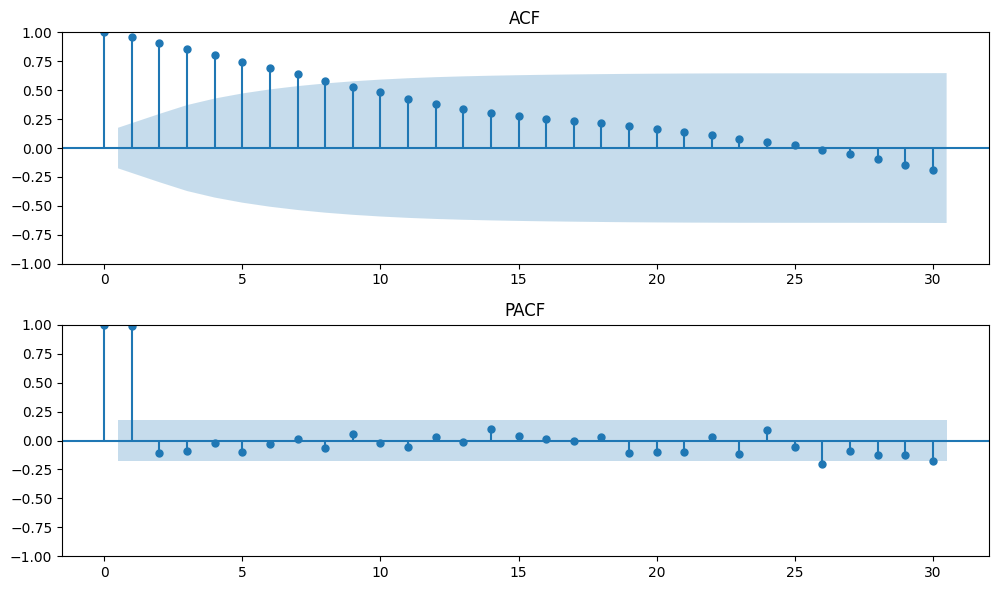

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
plot_acf(close_df,lags=30, ax=ax[0],title='ACF')
plot_pacf(close_df,lags=30, ax=ax[1], method='ols',title='PACF')

plt.tight_layout()
plt.show()


In [19]:
close_df.reset_index(inplace=True)
close_df.tail()

,Date,SPY
120,2023-12-22,473.649994
121,2023-12-26,475.649994
122,2023-12-27,476.510010
123,2023-12-28,476.690002
124,2023-12-29,475.309998


In [20]:
x = len(close_df)
size = int(x * 0.8)
index = x - size
train_data = close_df.iloc[:size]
test_data = close_df.iloc[size:]

In [ ]:
from scipy import stats
#Augmented Dickey-Fuller Test
def check_normality(model):
    print(stats.normaltest(model.resid))
    if(stats.normaltest(model.resid)[1]<0.05):
        print("The residuals are not normally distributed")
    else:
        print("The residuals are normally distributed")
        
        


# AR

In [37]:
from statsmodels.tsa.ar_model import AutoReg
# Create training and test data
#
# train_data =close_df[:len(close_df)-100]
# test_data = close_df[len(close_df)-100:]
#
# Instantiate and fit the AR model with training data
#
ar_model = AutoReg(train_data['SPY'], lags=1).fit()
#
# Print Summary
#
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                    SPY   No. Observations:                  100
Model:                     AutoReg(1)   Log Likelihood                -260.488
Method:               Conditional MLE   S.D. of innovations              3.361
Date:                Tue, 02 Jan 2024   AIC                            526.976
Time:                        13:52:14   BIC                            534.762
Sample:                             1   HQIC                           530.126
                                  100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.5816     13.331      1.244      0.214      -9.546      42.709
SPY.L1         0.9626      0.030     31.783      0.000       0.903       1.022
                                    Roots           

In [38]:
check_normality(ar_model)

NormaltestResult(statistic=0.7591585942946789, pvalue=0.6841491721851435)
The residuals are normally distributed


## Arima

In [45]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(train_data['SPY'],order=(1, 1, 3))
results=model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                    SPY   No. Observations:                  100
Model:               SARIMAX(1, 1, 3)   Log Likelihood                -259.775
Date:                Tue, 02 Jan 2024   AIC                            529.550
Time:                        15:03:45   BIC                            542.526
Sample:                             0   HQIC                           534.800
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3746      1.384     -0.271      0.787      -3.087       2.338
ma.L1          0.5062      1.352      0.374      0.708      -2.144       3.157
ma.L2          0.1530      0.239      0.640      0.5

In [39]:
check_normality(results)

NormaltestResult(statistic=215.00492619636333, pvalue=2.0524542506831218e-47)
The residuals are not normally distributed


# Auto ARIMA

In [21]:
from pmdarima import auto_arima
# stepwise_fit = auto_arima(train_data['SPY'], trace=True,suppress_warnings=True )
#model = auto_arima(train_data['SPY'], trace=True, error_action='ignore', suppress_warnings=True)
model=auto_arima(train_data['SPY'],start_p=0,d=1,start_q=0,
          max_p=5,max_d=5,max_q=5, start_P=0,
          D=1, start_Q=0, max_P=5,max_D=5,
          max_Q=5, m=7, seasonal=True,
          error_action='warn',trace=True,
          supress_warnings=True,stepwise=True,
          random_state=30,n_fits=60)
model.fit(train_data['SPY'])

forecast = model.predict(n_periods=len(test_data))
forecast = pd.DataFrame(forecast,index = test_data.index,columns=['Prediction'])



Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=549.709, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=533.178, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.53 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=547.698, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=525.220, Time=0.29 sec
 ARIMA(1,1,0)(3,1,0)[7]             : AIC=524.504, Time=0.42 sec
 ARIMA(1,1,0)(4,1,0)[7]             : AIC=521.598, Time=1.25 sec
 ARIMA(1,1,0)(5,1,0)[7]             : AIC=523.399, Time=1.35 sec
 ARIMA(1,1,0)(4,1,1)[7]             : AIC=522.233, Time=1.89 sec
 ARIMA(1,1,0)(3,1,1)[7]             : AIC=inf, Time=2.39 sec
 ARIMA(1,1,0)(5,1,1)[7]             : AIC=524.119, Time=2.93 sec
 ARIMA(0,1,0)(4,1,0)[7]             : AIC=521.354, Time=0.87 sec
 ARIMA(0,1,0)(3,1,0)[7]             : AIC=523.338, Time=0.27 sec
 ARIMA(0,1,0)(5,1,0)[7]             : AIC=523.174, Time=1.18 sec
 ARIMA(0,1,0)(4,1,1)[7]             : AIC=522.200, Time

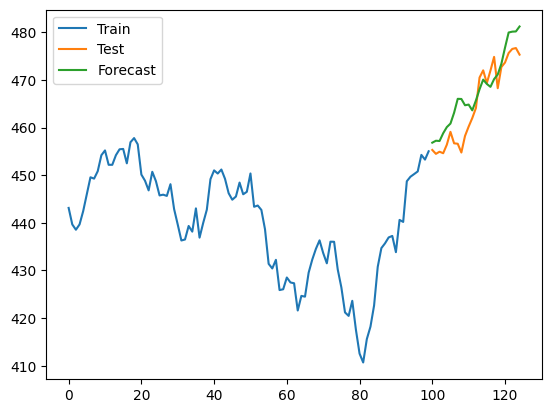

In [22]:
#plot the predictions for test validation set
plt.plot(train_data['SPY'], label='Train')
plt.plot(test_data['SPY'], label='Test')
plt.plot(forecast, label='Forecast')
plt.legend(loc = 'upper left')
plt.show()

In [23]:
forecast.tail()

,Prediction
120,476.768557
121,479.955803
122,480.134852
123,480.179313
124,481.221446


Performing stepwise search to minimize bic
 ARIMA(0,1,0)(0,1,0)[7]             : BIC=552.231, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[7]             : BIC=540.744, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[7]             : BIC=inf, Time=0.80 sec
 ARIMA(1,1,0)(0,1,0)[7]             : BIC=552.742, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[7]             : BIC=535.307, Time=0.33 sec
 ARIMA(1,1,0)(3,1,0)[7]             : BIC=537.113, Time=0.47 sec
 ARIMA(1,1,0)(2,1,1)[7]             : BIC=inf, Time=2.17 sec
 ARIMA(1,1,0)(1,1,1)[7]             : BIC=inf, Time=1.36 sec
 ARIMA(1,1,0)(3,1,1)[7]             : BIC=inf, Time=3.02 sec
 ARIMA(0,1,0)(2,1,0)[7]             : BIC=532.168, Time=0.22 sec
 ARIMA(0,1,0)(1,1,0)[7]             : BIC=539.328, Time=0.11 sec
 ARIMA(0,1,0)(3,1,0)[7]             : BIC=533.425, Time=0.33 sec
 ARIMA(0,1,0)(2,1,1)[7]             : BIC=inf, Time=2.00 sec
 ARIMA(0,1,0)(1,1,1)[7]             : BIC=inf, Time=0.88 sec
 ARIMA(0,1,0)(3,1,1)[7]             : BIC=inf, Time=2.75 sec
 ARIMA(0,1

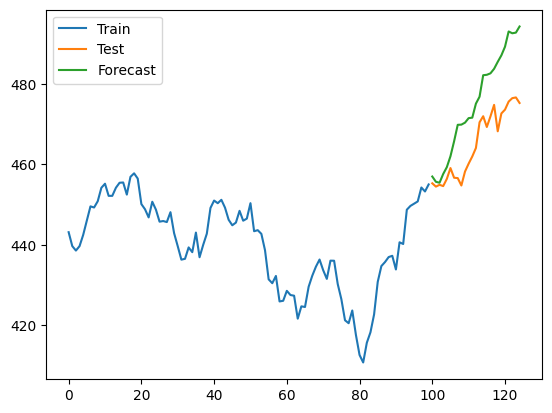

In [24]:
from pmdarima import auto_arima
info="bic"
# stepwise_fit = auto_arima(train_data['SPY'], trace=True,suppress_warnings=True )
#model = auto_arima(train_data['SPY'], trace=True, error_action='ignore', suppress_warnings=True)
model=auto_arima(train_data['SPY'],start_p=0,d=1,start_q=0,
          max_p=5,max_d=5,max_q=5, start_P=0,
          D=1, start_Q=0, max_P=5,max_D=5,
          max_Q=5, m=7, seasonal=True,
          error_action='warn',trace=True,
          supress_warnings=True,stepwise=True,
          random_state=20,n_fits=50,information_criterion="bic" )
model.fit(train_data['SPY'])

forecast = model.predict(n_periods=len(test_data))
forecast = pd.DataFrame(forecast,index = test_data.index,columns=['Prediction'])
plt.plot(train_data['SPY'], label='Train')
plt.plot(test_data['SPY'], label='Test')
plt.plot(forecast, label='Forecast')
plt.legend(loc = 'upper left')
plt.show()

Performing stepwise search to minimize hqic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : HQIC=528.591, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : HQIC=529.958, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : HQIC=530.238, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : HQIC=525.665, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : HQIC=532.373, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.378 seconds


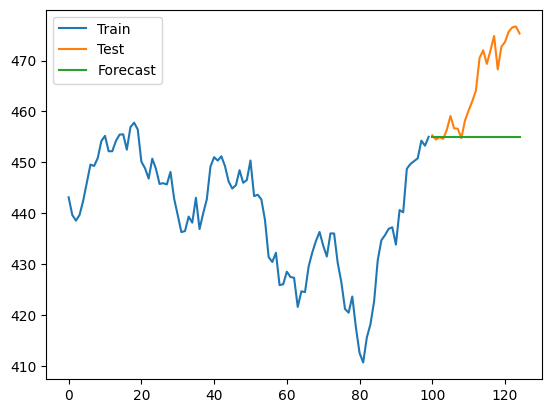

In [41]:
from pmdarima import auto_arima
# stepwise_fit = auto_arima(train_data['SPY'], trace=True,suppress_warnings=True )
#model = auto_arima(train_data['SPY'], trace=True, error_action='ignore', suppress_warnings=True)
model=auto_arima(train_data['SPY'],start_p=0,d=1,start_q=0,
          max_p=5,max_d=5,max_q=5, start_P=0,
          D=1, start_Q=0, max_P=5,max_D=5,
          max_Q=5, seasonal=True,
          error_action='warn',trace=True,
          supress_warnings=True,stepwise=True,
          random_state=20,n_fits=50,information_criterion='hqic' )
model.fit(train_data['SPY'])

forecast = model.predict(n_periods=len(test_data))
forecast = pd.DataFrame(forecast,index = test_data.index,columns=['Prediction'])
plt.plot(train_data['SPY'], label='Train')
plt.plot(test_data['SPY'], label='Test')
plt.plot(forecast, label='Forecast')
plt.legend(loc = 'upper left')
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.99 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=526.491, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=526.808, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=527.088, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=524.615, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=528.173, Time=0.24 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.627 seconds


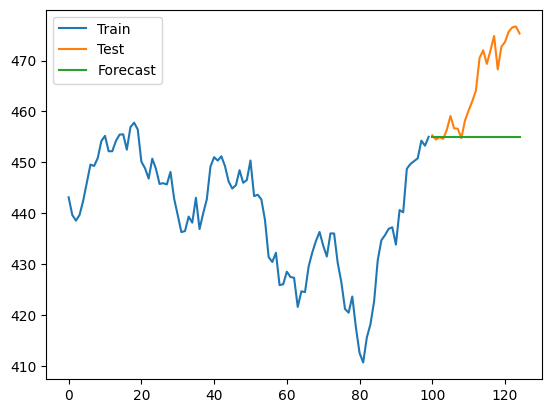

In [43]:
from pmdarima import auto_arima
# stepwise_fit = auto_arima(train_data['SPY'], trace=True,suppress_warnings=True )
model = auto_arima(train_data['SPY'], trace=True, error_action='ignore', suppress_warnings=True)
# model=auto_arima(train_data['SPY'],start_p=0,d=1,start_q=0,
#           max_p=5,max_d=5,max_q=5, start_P=0,
#           D=1, start_Q=0, max_P=5,max_D=5,
#           max_Q=5,
#           error_action='warn',trace=True,
#           supress_warnings=True,stepwise=True,
#           random_state=20,n_fits=50,information_criterion='oob' )
model.fit(train_data['SPY'])

forecast = model.predict(n_periods=len(test_data))
forecast = pd.DataFrame(forecast,index = test_data.index,columns=['Prediction'])
plt.plot(train_data['SPY'], label='Train')
plt.plot(test_data['SPY'], label='Test')
plt.plot(forecast, label='Forecast')
plt.legend(loc = 'upper left')
plt.show()

In [27]:
from sklearn.metrics import r2_score
r2_score(test_data['SPY'], forecast)

0.7014105586269705

In [28]:
model
# le ARIMA recevra une commande de (p,d,q) pour tous les points et un (P,D,Q) pour chaque trimestre.

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(4, 1, 0, 7),
      suppress_warnings=True, with_intercept=False)

In [31]:
results.resid

0     443.130005
1      -3.470669
2      -0.656262
3       1.517276
4       2.435804
         ...    
95     -0.647978
96      1.255644
97      3.166818
98     -1.508050
99      1.701779
Length: 100, dtype: float64

In [32]:
close_df['forecast']=results.predict(start=test_data.index[0], end=test_data.index[-1]+100,dynamic=True)
close_df.tail(100)
# forecast and train data together superposés
#close_df[['SPY','forecast']].plot(figsize=(12,8))


,Date,SPY,forecast
25,2023-08-09,445.750000,NaN
26,2023-08-10,445.910004,NaN
27,2023-08-11,445.649994,NaN
28,2023-08-14,448.109985,NaN
29,2023-08-15,442.890015,NaN
...,...,...,...
120,2023-12-22,473.649994,455.106689
121,2023-12-26,475.649994,455.106689
122,2023-12-27,476.510010,455.106689
123,2023-12-28,476.690002,455.106689


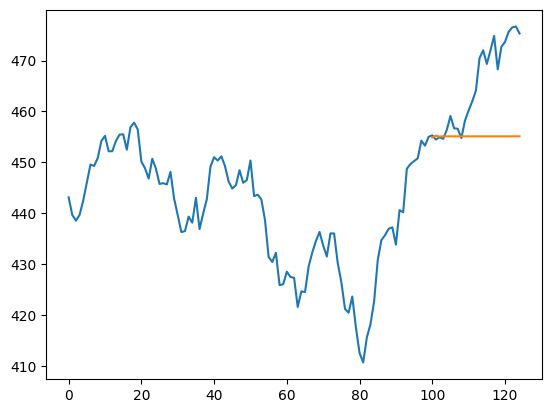

In [33]:
fig, ax = plt.subplots()
ax.plot(close_df[['SPY']])
ax.plot(close_df[['forecast']])
plt.show()


In [34]:
# test the normality of the errors of this arima model
from scipy import stats
def check_normality(model):
    print(stats.normaltest(model.resid))
    if(stats.normaltest(model.resid)[1]<0.05):
        print("The residuals are not normally distributed")
    else:
        print("The residuals are normally distributed")
        
        


In [ ]:
# test the normality of the errors of this arima model


NormaltestResult(statistic=0.6382842446778276, pvalue=0.7267722513938158)
The residuals are normally distributed
